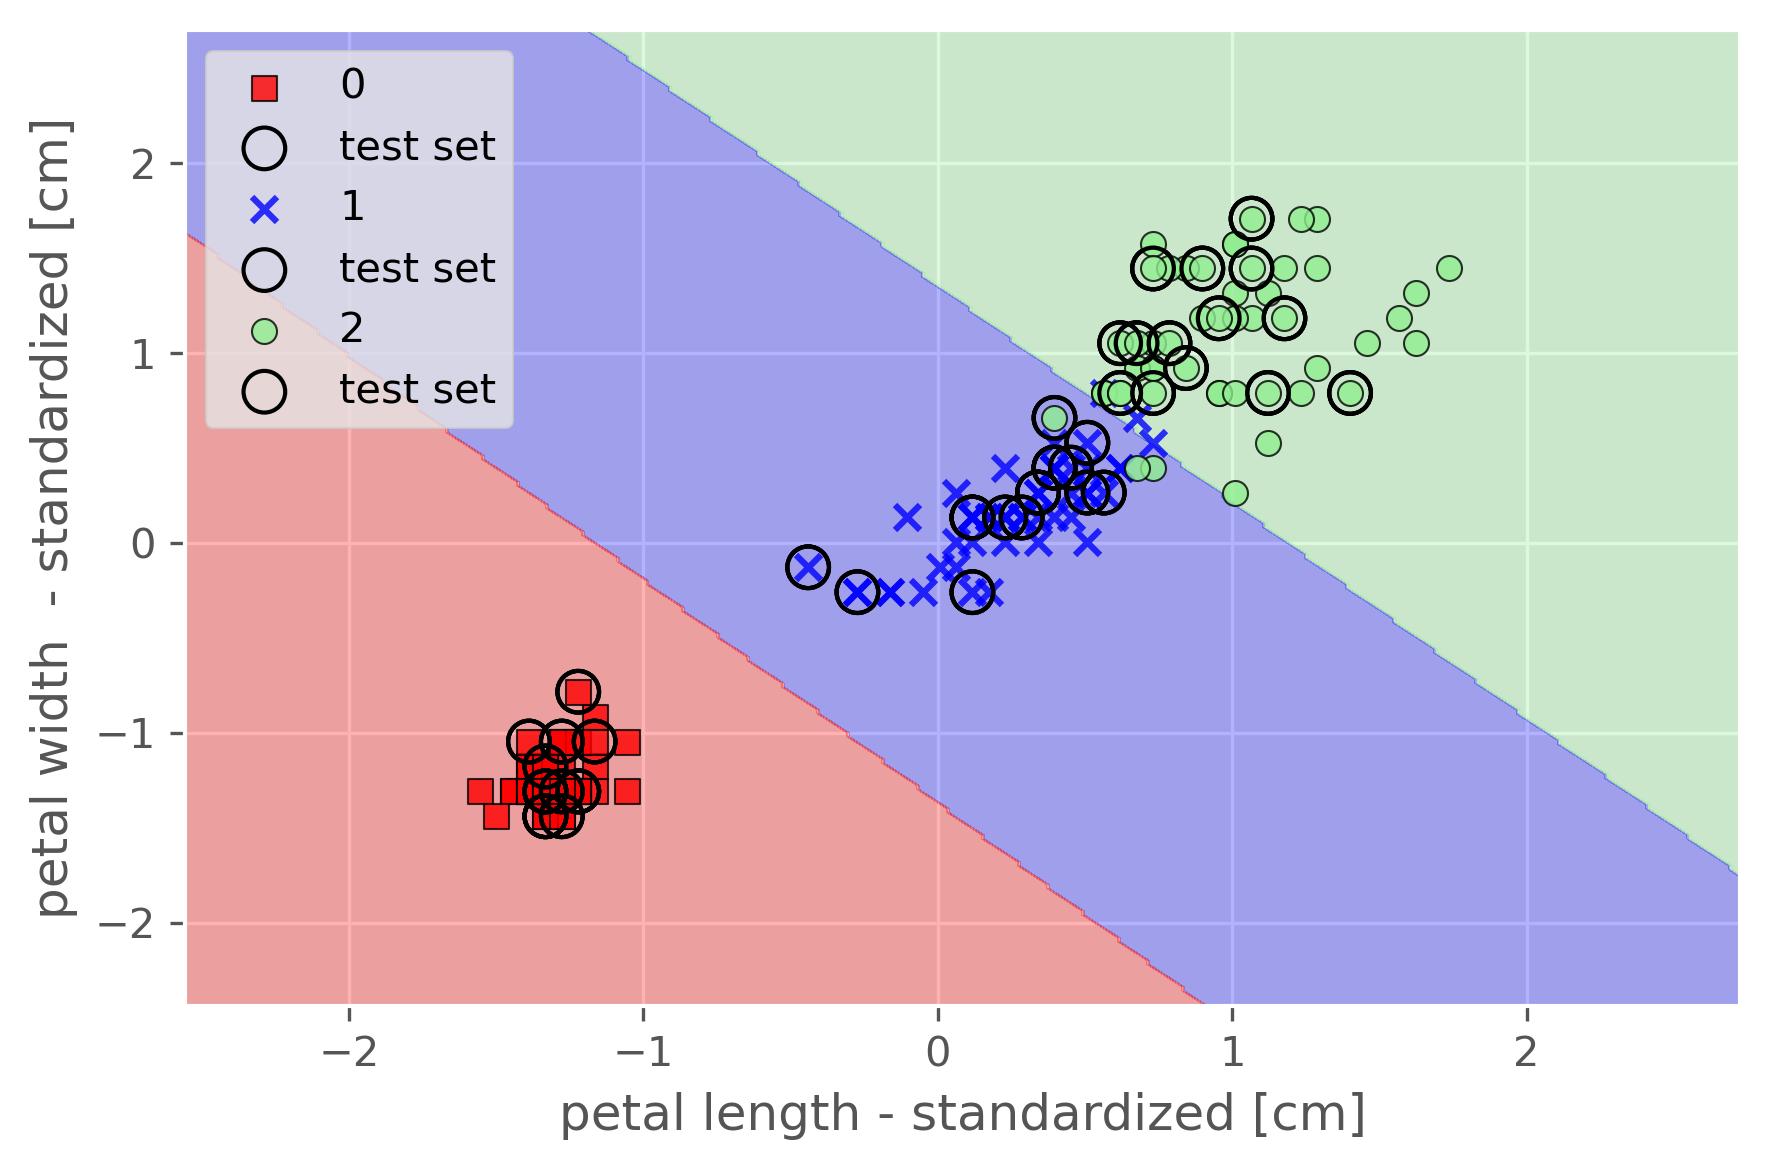

In [6]:
#SVM으로 아이리스 데이터 3중 분류 fit & 그래프화
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 1, stratify = y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#svm 모델 피팅
svm = SVC(kernel = 'linear', C = 1.0, random_state = 1)
svm.fit(X_train_std, y_train)

#그래프 그리기 함수
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], 
                   y = X[y == cl, 1],
                   alpha = 0.8,
                   c = colors[idx],
                   marker = markers[idx],
                   label = cl,
                   edgecolor = 'black')
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            
            plt.scatter(X_test[:, 0], X_test[:, 1],
                       facecolors = 'none', edgecolor = 'black', alpha = 1.0,
                       linewidth = 1, marker = 'o', s = 100, label = 'test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

#classifier를 svm으로 
plot_decision_regions(X = X_combined_std,
                     y = y_combined, classifier = svm, test_idx = range(105, 150))
plt.xlabel('petal length - standardized [cm]')
plt.ylabel('petal width  - standardized [cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

### 로지스틱 회귀 분류와 비교 
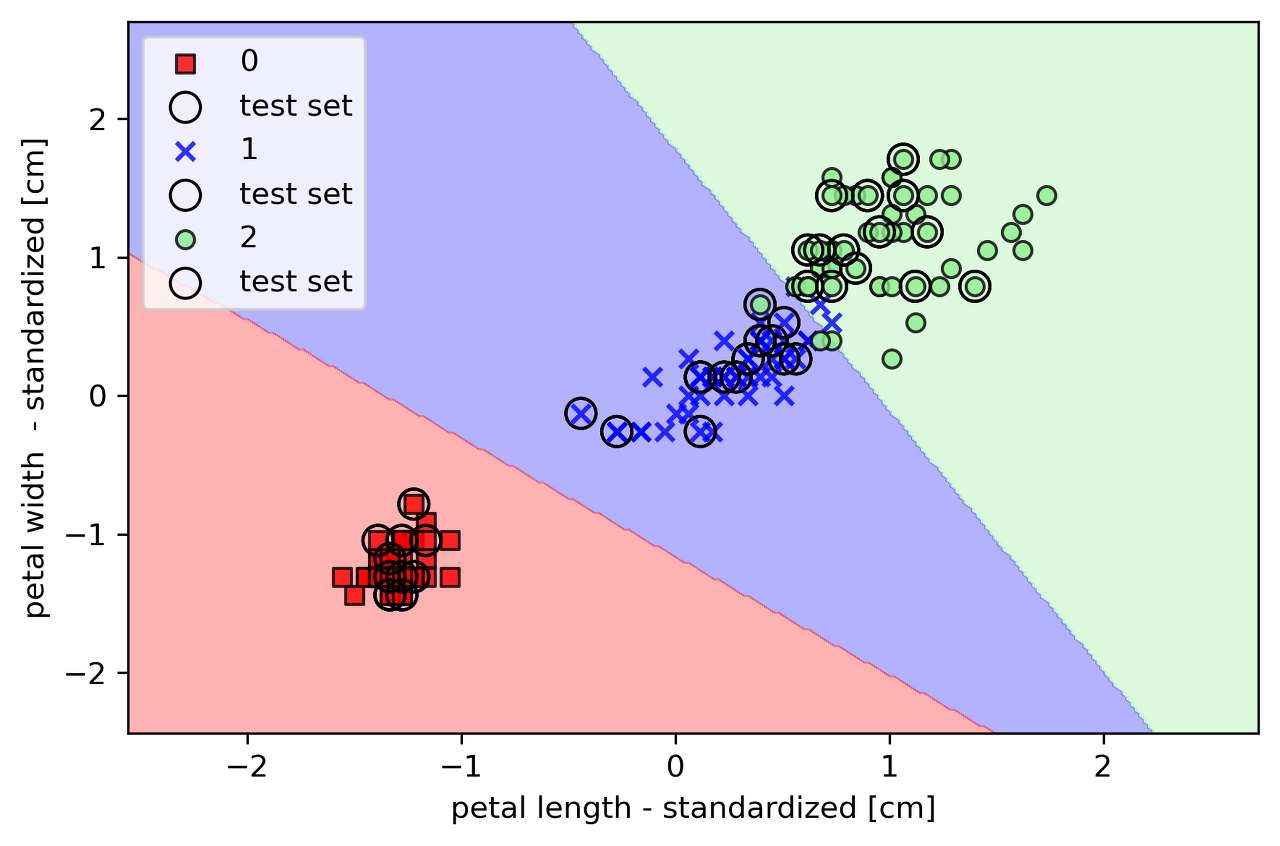

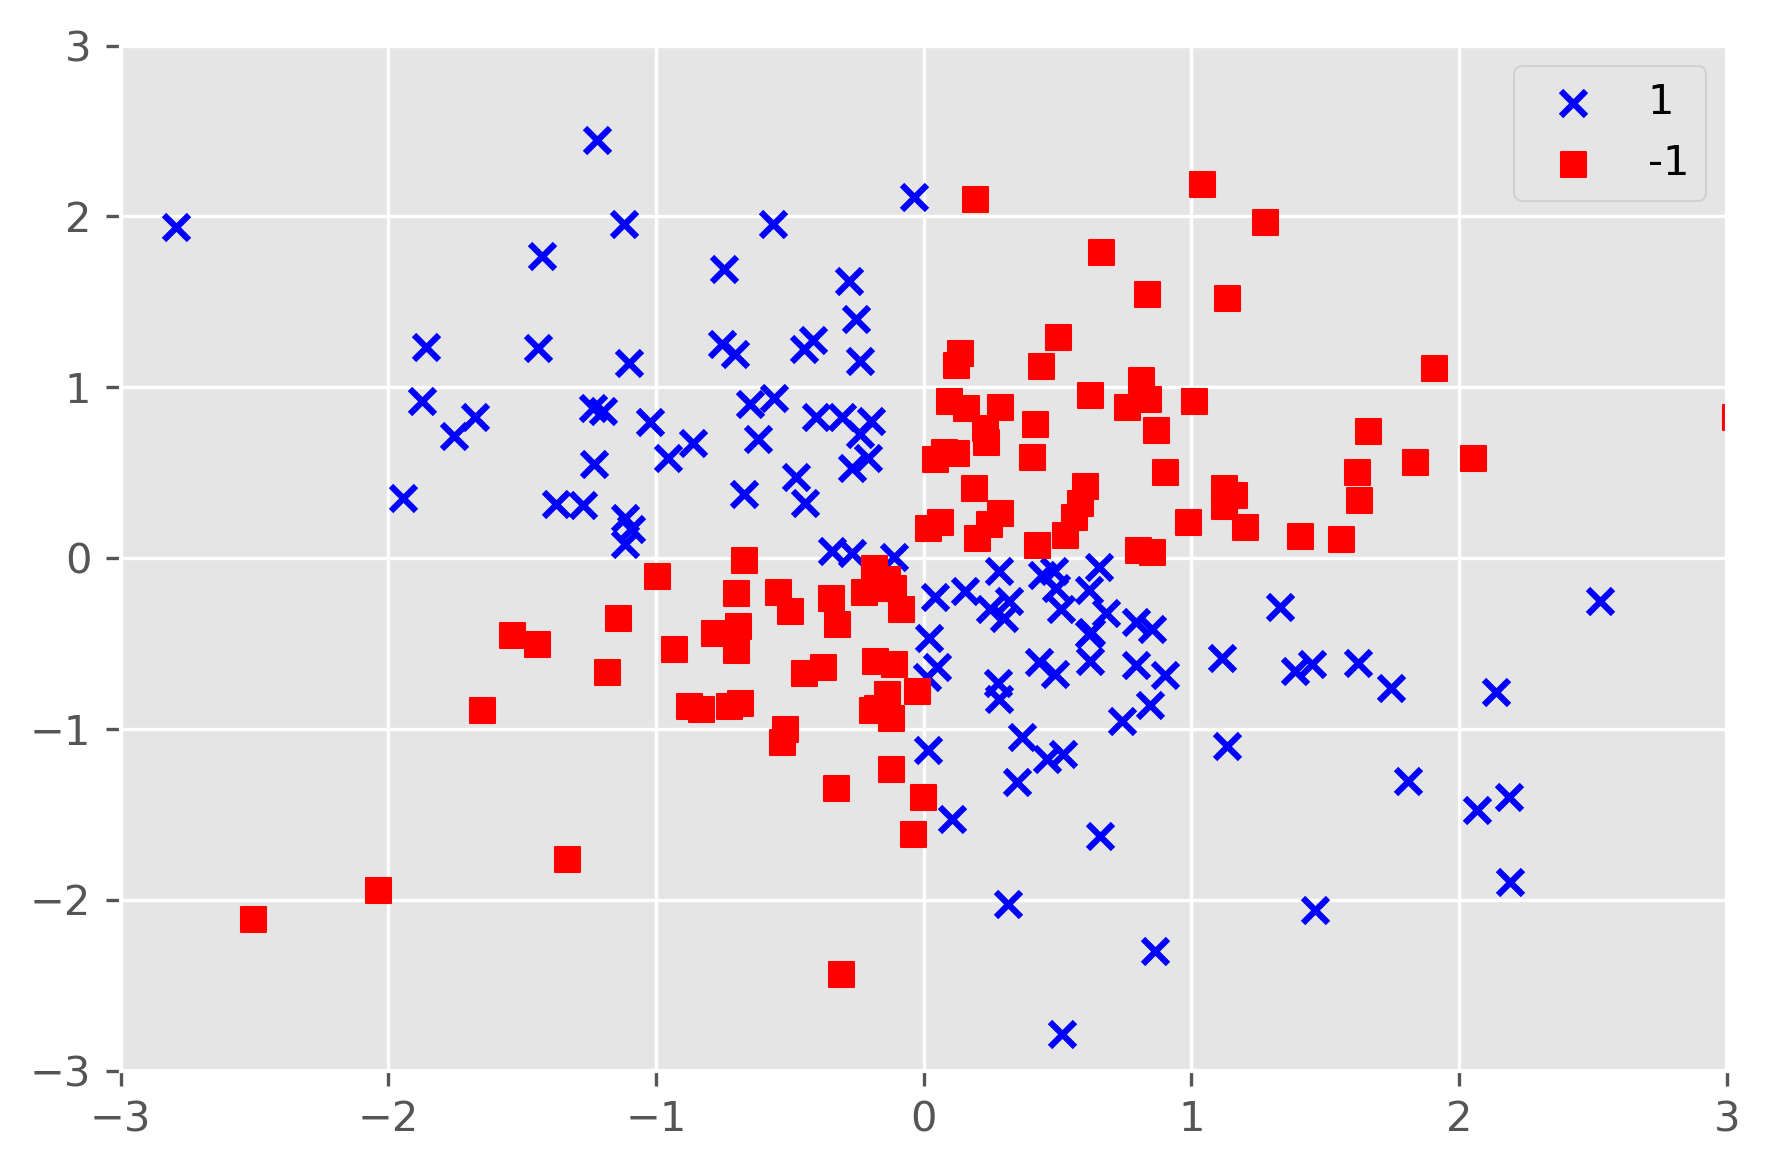

In [9]:
import matplotlib.pyplot as plt
import numpy as np

#Xor 임의 데이터셋 만들기
np.random.seed(1)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c = 'b', marker = 'x', label = '1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c = 'r', marker = 's', label = '-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc = 'best')
plt.tight_layout()
plt.rcParams["figure.dpi"] = 300
plt.style.use('ggplot')
plt.show()

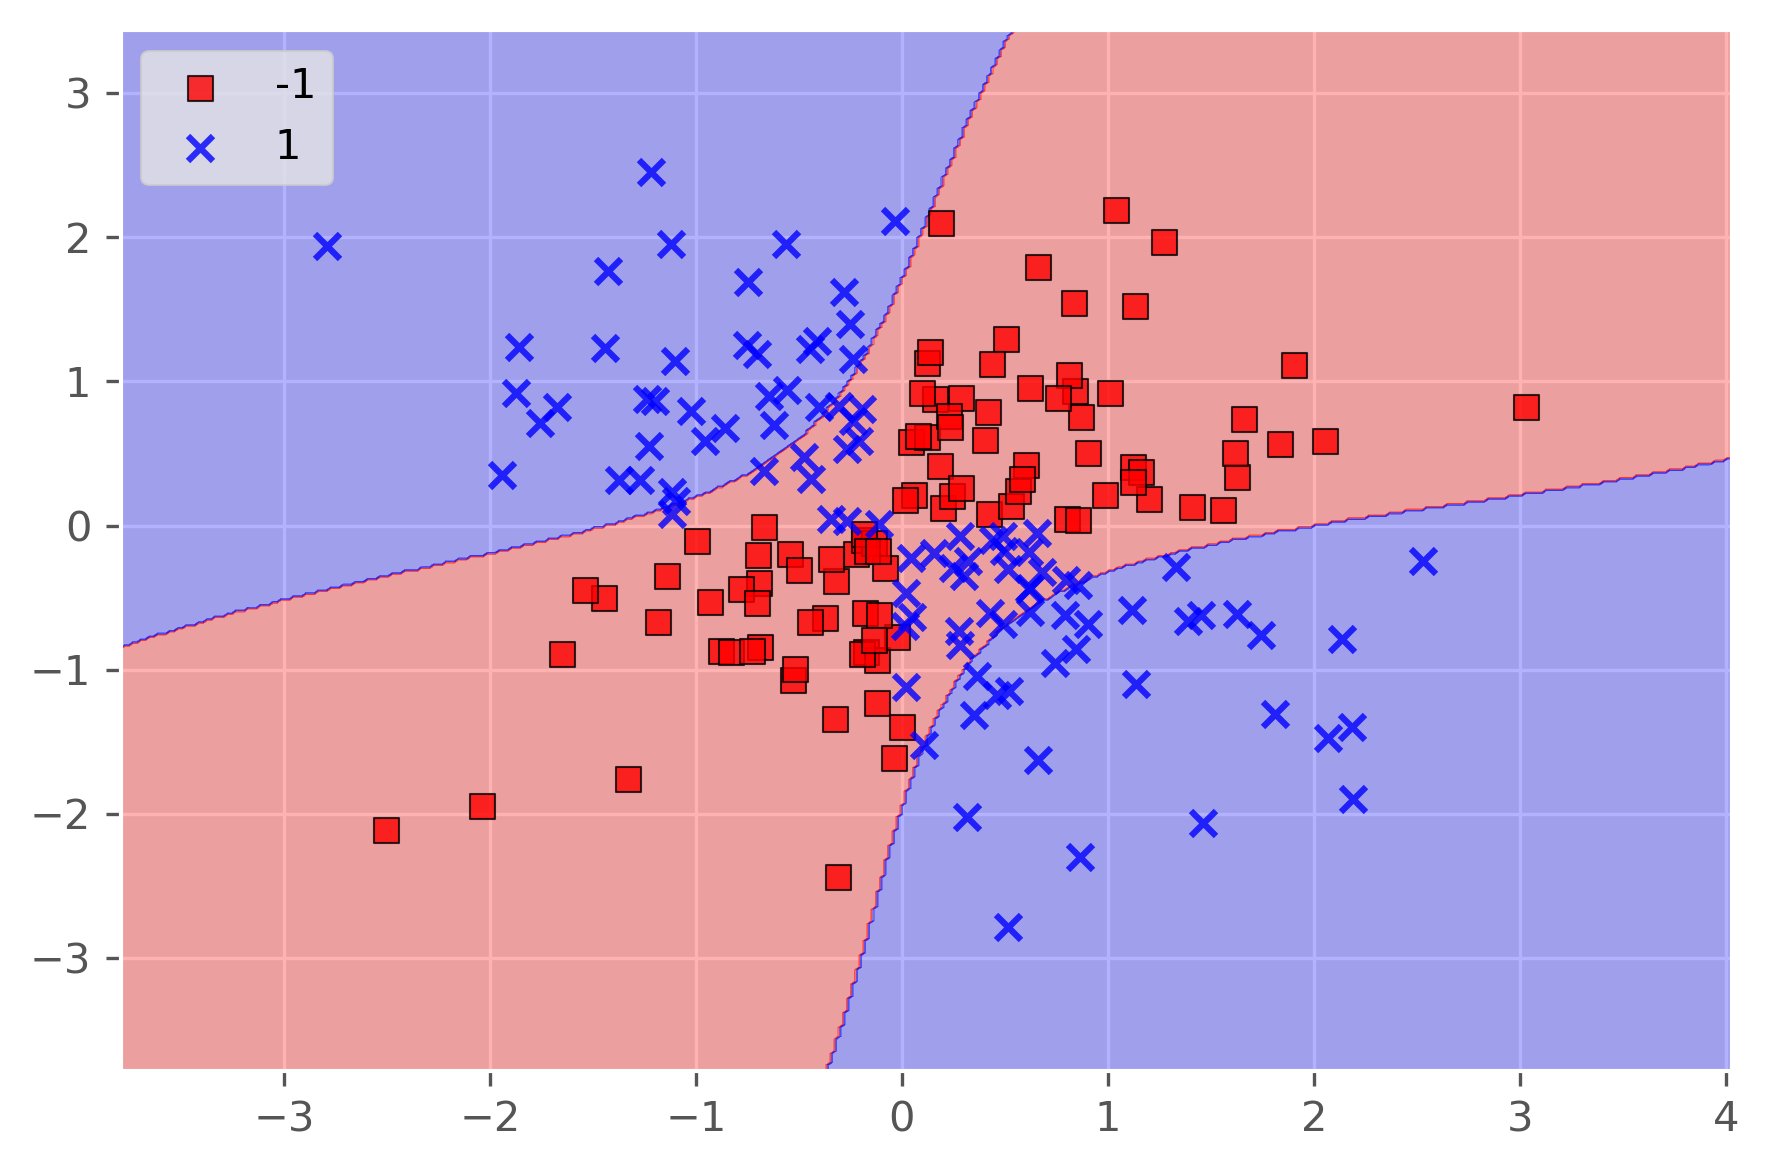

In [12]:
#svm 커널 기법, 방사기저함수(rbf)
svm = SVC(kernel = 'rbf', C = 1.0, random_state = 1, gamma = 0.10)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

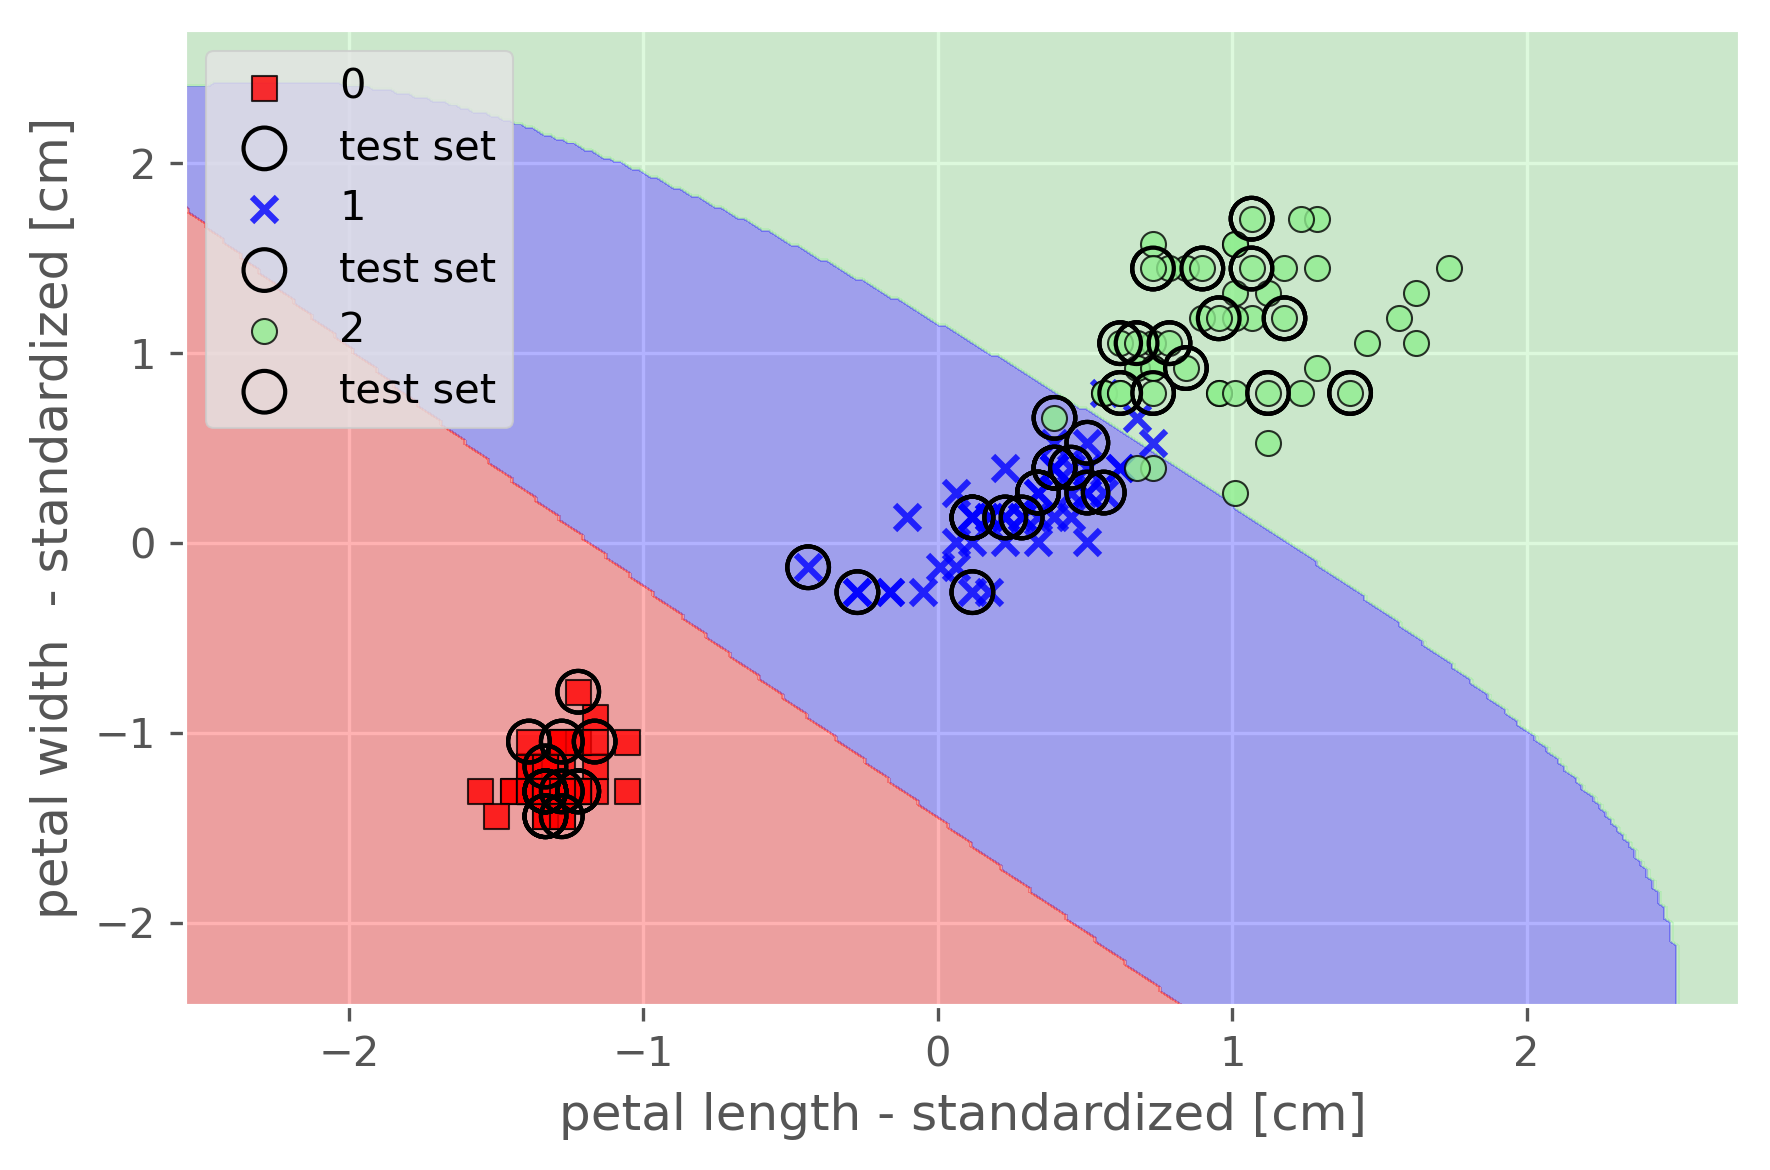

In [13]:
#감마 값으로 가우시안 구 크기 제한
svm = SVC(kernel = 'rbf', C = 1.0, random_state = 1, gamma = 0.2)
svm.fit(X_train_std, y_train)

plot_decision_regions(X = X_combined_std,
                     y = y_combined, classifier = svm, test_idx = range(105, 150))
plt.xlabel('petal length - standardized [cm]')
plt.ylabel('petal width  - standardized [cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

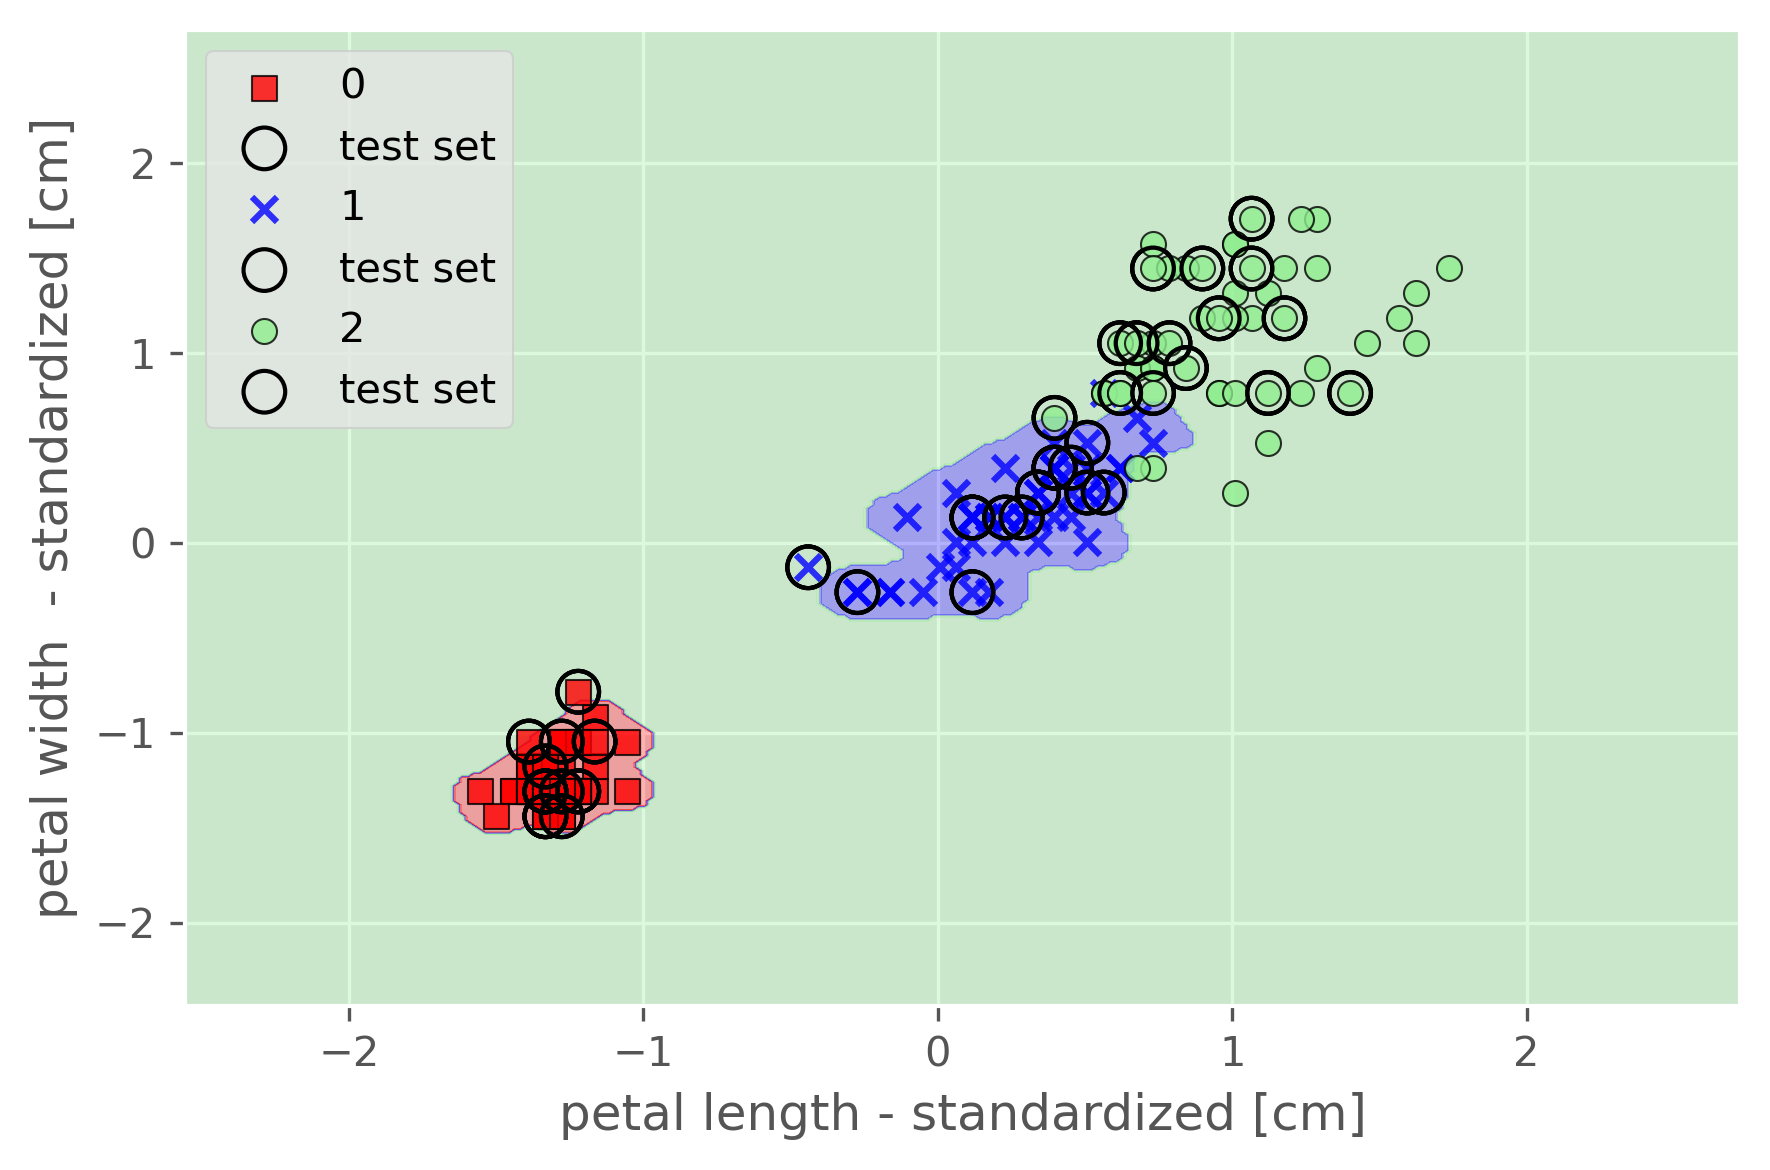

In [14]:
#svm 커널 기법, 방사기저함수(rbf)
svm = SVC(kernel = 'rbf', C = 1.0, random_state = 1, gamma = 100.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X = X_combined_std,
                     y = y_combined, classifier = svm, test_idx = range(105, 150))
plt.xlabel('petal length - standardized [cm]')
plt.ylabel('petal width  - standardized [cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()